In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

CLIENT_ID = '5ccd70c6cd434f7fa1d9987fb9ad5e92'
CLIENT_SECRET = '974676f604b147fa9ef23261eb6b90a6'
REDIRECT_URI = 'https://spotify.apkflames.com/playlist-generator'


SCOPE = 'playlist-read-private playlist-read-collaborative'

def get_token(scope):
    sp_oauth = SpotifyOAuth(client_id=CLIENT_ID,
                            client_secret=CLIENT_SECRET,
                            redirect_uri=REDIRECT_URI,
                            scope=scope)
    token_info = sp_oauth.get_access_token()
    return token_info['access_token']


token = get_token(SCOPE)


sp = spotipy.Spotify(auth=token)


playlist_id = '1mwIluT6YC7UOrVfMNoowr'


playlist = sp.playlist(playlist_id)


print(f"Playlist Name: {playlist['name']}")
print(f"Playlist Description: {playlist['description']}")
print(f"Total Tracks: {playlist['tracks']['total']}")


for idx, item in enumerate(playlist['tracks']['items'][:10]):
    track = item['track']
    print(f"{idx + 1}: {track['name']} by {track['artists'][0]['name']}")

C:\Users\wuyuh\AppData\Local\Temp\ipykernel_38492\2011603969.py:14: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token()


Playlist Name: All Taylor Swift Songs
Playlist Description: ALL TAYLOR SWIFT SONGS in order plus a few extras. All available taylors versions included. 🤍
Total Tracks: 262
1: Tim McGraw by Taylor Swift
2: Teardrops On My Guitar - Radio Single Remix by Taylor Swift
3: Picture To Burn by Taylor Swift
4: A Place in this World by Taylor Swift
5: Cold As You by Taylor Swift
6: The Outside by Taylor Swift
7: Tied Together with a Smile by Taylor Swift
8: Stay Beautiful by Taylor Swift
9: Should've Said No by Taylor Swift
10: Mary's Song (Oh My My My) by Taylor Swift


In [9]:

df = pd.DataFrame(columns=[
    'track_name', 'artist', 'track_URI', 'acousticness', 'danceability', 
    'energy', 'instrumentalness', 'key', 'liveness', 'mode', 
    'loudness', 'speechiness', 'tempo', 'valence'
])


offset = 0
limit = 100


while True:
    try:
        playlist_tracks = sp.playlist_tracks(playlist_id, offset=offset, limit=limit)
        items = playlist_tracks['items']
        
        if not items:
            break
        
        for item in items:
            try:
                track = item['track']
                track_name = track['name']
                artist = track['artists'][0]['name']
                track_URI = track['uri']
                print(track_name)
                
                
                audio_features = sp.audio_features(track_URI)[0]
                
                
                track_df = pd.DataFrame([{
                    'track_name': track_name,
                    'artist': artist,
                    'track_URI': track_URI,
                    'acousticness': audio_features['acousticness'],
                    'danceability': audio_features['danceability'],
                    'energy': audio_features['energy'],
                    'instrumentalness': audio_features['instrumentalness'],
                    'key': audio_features['key'],
                    'liveness': audio_features['liveness'],
                    'mode': audio_features['mode'],
                    'loudness': audio_features['loudness'],
                    'speechiness': audio_features['speechiness'],
                    'tempo': audio_features['tempo'],
                    'valence': audio_features['valence']
                }])
                
                
                df = pd.concat([df, track_df], ignore_index=True)
            except Exception as e:
                print(f"Error processing track {track_name}: {e}")
        
        
        offset += limit
    except Exception as e:
        print(f"Error fetching tracks: {e}")


df.to_csv('playlist_tracks.csv', index=False)

print("Data successfully saved to playlist_tracks.csv")

Tim McGraw
Teardrops On My Guitar - Radio Single Remix
Picture To Burn


C:\Users\wuyuh\AppData\Local\Temp\ipykernel_38492\3183519329.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, track_df], ignore_index=True)


A Place in this World
Cold As You
The Outside
Tied Together with a Smile
Stay Beautiful
Should've Said No
Mary's Song (Oh My My My)
Our Song
I'm Only Me When I'm With You
Invisible
A Perfectly Good Heart
Fearless (Taylor’s Version)
Fifteen (Taylor’s Version)
Love Story (Taylor’s Version)
Hey Stephen (Taylor’s Version)
White Horse (Taylor’s Version)
You Belong With Me (Taylor’s Version)
Breathe (feat. Colbie Caillat) (Taylor’s Version)
Tell Me Why (Taylor’s Version)
You’re Not Sorry (Taylor’s Version)
The Way I Loved You (Taylor’s Version)
Forever & Always (Taylor’s Version)
The Best Day (Taylor’s Version)
Change (Taylor’s Version)
Jump Then Fall (Taylor’s Version)
Untouchable (Taylor’s Version)
Forever & Always (Piano Version) (Taylor’s Version)
Come In With The Rain (Taylor’s Version)
The Other Side Of The Door (Taylor’s Version)
Today Was A Fairytale (Taylor’s Version)
You All Over Me (feat. Maren Morris) (Taylor’s Version) (From The Vault)
Mr. Perfectly Fine (Taylor’s Version) (From

In [10]:
file_path = 'taylor_swift_spotify.csv'
df = pd.read_csv(file_path)
df

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.50200,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,89,228965
1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.04830,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,87,293048
2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.13700,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,88,203801
3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.56000,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,89,261228
4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.73000,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,88,262974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Our Song,Taylor Swift,2006-10-24,11,1j6gmK6u4WNI33lMZ8dC1s,spotify:track:1j6gmK6u4WNI33lMZ8dC1s,0.11100,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,65,201106
318,I'm Only Me When I'm With You,Taylor Swift,2006-10-24,12,7CzxXgQXurKZCyHz9ufbo1,spotify:track:7CzxXgQXurKZCyHz9ufbo1,0.00452,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,55,213053
319,Invisible,Taylor Swift,2006-10-24,13,1k3PzDNjg38cWqOvL4M9vq,spotify:track:1k3PzDNjg38cWqOvL4M9vq,0.63700,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,53,203226
320,A Perfectly Good Heart,Taylor Swift,2006-10-24,14,0YgHuReCSPwTXYny7isLja,spotify:track:0YgHuReCSPwTXYny7isLja,0.00349,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,52,220146


In [12]:

features = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 
               'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 0.4524431 , -0.65097361, -0.91660384, ..., -0.3365833 ,
         2.21350221, -0.5851452 ],
       [-0.9184323 ,  0.20487117, -0.7010561 , ..., -0.39973476,
        -0.39307023, -0.52747955],
       [-0.65042118,  0.13640358, -0.00822409, ..., -0.38305325,
        -0.81352731,  0.46332122],
       ...,
       [ 0.86035181,  0.27333875, -0.87554712, ..., -0.41403321,
        -0.84770978, -0.83677714],
       [-1.05382778, -0.83070102,  0.95660863, ..., -0.26866569,
         1.06838961, -0.65329552],
       [-0.94290683, -1.03610376,  0.96687281, ..., -0.06372133,
         2.46837203,  0.47380588]])

In [13]:
import numpy as np

# 初始化质心，通过在数据集 X 中随机选择 k 个点
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# 计算数据集 X 中每个点与每个质心之间的距离
def compute_distances(X, centroids):
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
    return distances

# 根据计算出的距离，将数据集 X 中的每个点分配给最近的质心
def assign_clusters(distances):
    return np.argmin(distances, axis=1)

# 更新质心，通过计算每个簇中所有点的平均值来得到新的质心
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids

# 定义算法：
def kmeans_mine(X, k, max_iters=10000, tol=1e-6):
    # 初始化质心
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids
        # 计算距离
        distances = compute_distances(X, centroids)
        # 分配簇
        labels = assign_clusters(distances)
        # 更新质心
        centroids = update_centroids(X, labels, k)
        # 判断是否收敛
        if np.linalg.norm(centroids - old_centroids) < tol:
            break
    return labels, centroids


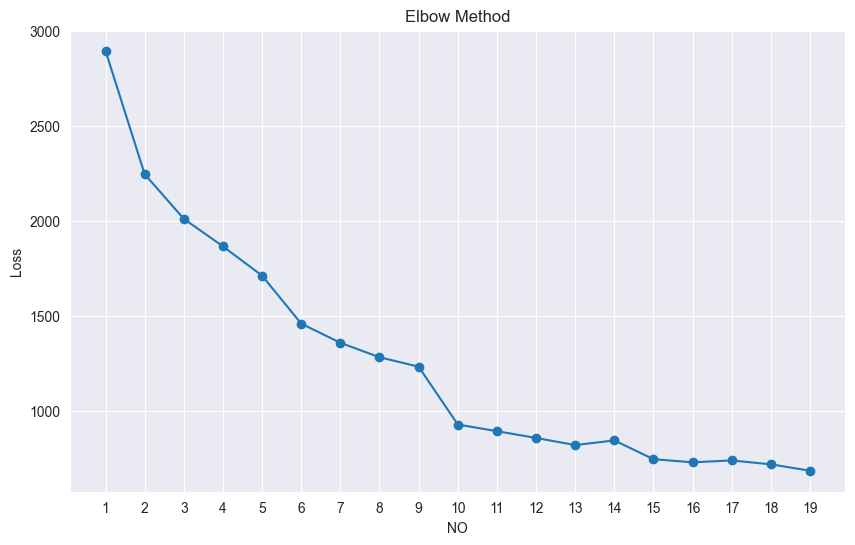

In [33]:
loss = []
from sklearn.metrics import pairwise_distances_argmin_min


for k in range(1, 20):
    labels, centroids = kmeans_mine(scaled_features, k)
    closest, distances = pairwise_distances_argmin_min(scaled_features, centroids)
    loss.append( np.sum(distances ** 2))



plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), loss, marker='o')
plt.title('Elbow Method')
plt.xlabel('NO')
plt.ylabel('Loss')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()


In [39]:
k = 6
labels, centroids = kmeans_mine(scaled_features, k)
df['cluster'] = labels
cluster_groups = df.groupby('cluster')
for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")
    for track_name in group['name']:
        print(track_name)
    print("\n")

Cluster 0:
august - the long pond studio sessions
Sparks Fly - Live/2011
Mine - Live/2011
The Story Of Us - Live
Mean - Live/2011
Ours - Live/2011
Back To December/Apologize/You're Not Sorry - Live/2011/Medley
Better Than Revenge - Live/2011
Speak Now - Live/2011
Last Kiss - Live/2011
Drops Of Jupiter - Live/2011
Bette Davis Eyes - Live/2011
Dear John - Live/2011
Enchanted - Live/2011
Haunted - Live/2011
Long Live - Live/2011


Cluster 1:
Vigilante Shit
I Forgot That You Existed
I Know Places - Voice Memo
I Wish You Would - Voice Memo
Blank Space - Voice Memo


Cluster 2:
I Can See You (Taylor’s Version) (From The Vault)
Foolish One (Taylor’s Version) (From The Vault)
Timeless (Taylor’s Version) (From The Vault)
Anti-Hero
The Great War
Babe (Taylor's Version) (From The Vault)
Message In A Bottle (Taylor's Version) (From The Vault)
The Very First Night (Taylor's Version) (From The Vault)
closure
right where you left me - bonus track
the last great american dynasty
The Man
Miss Americana

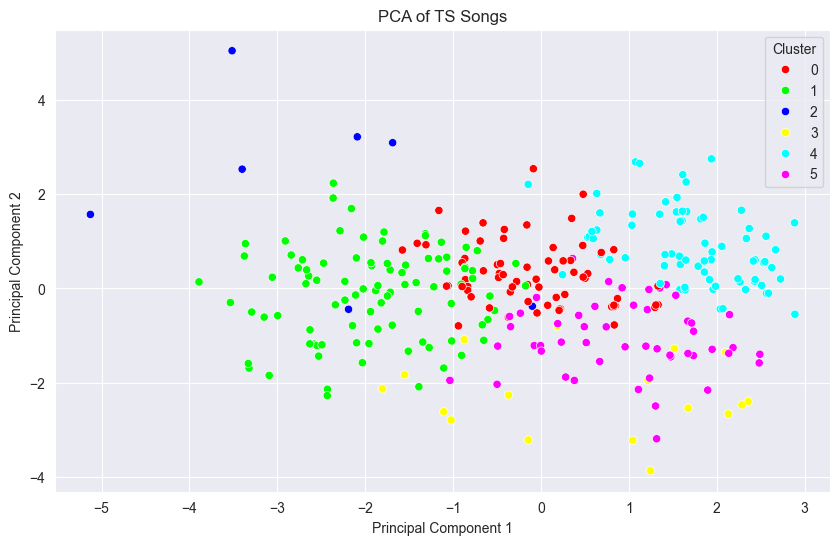

In [42]:


pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


df['pca_1'] = pca_features[:, 0]
df['pca_2'] = pca_features[:, 1]


custom_palette = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF']


# 可视化PCA结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df, palette=custom_palette)
plt.title('PCA of TS Songs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()







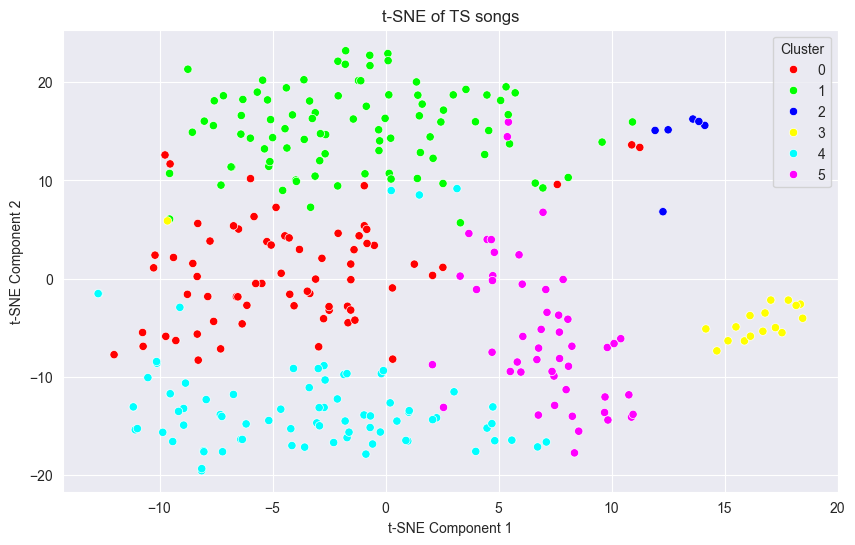

In [44]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(scaled_features)


df['tsne_1'] = tsne_features[:, 0]
df['tsne_2'] = tsne_features[:, 1]



custom_palette = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF']

# 可视化t-SNE结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='cluster_sk', data=df, palette=custom_palette)
plt.title('t-SNE of TS songs')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

In [45]:
def silhouette_score_manual(X, labels):
    n_samples = len(labels)  # 样本数量
    unique_labels = np.unique(labels)  # 唯一簇的数量
    n_clusters = len(unique_labels)  # 簇的数量

    # 如果簇的数量为1或者每个样本都有自己的簇，则轮廓系数为0
    if n_clusters == 1 or n_clusters == n_samples:
        return 0

    A = np.zeros(n_samples)  # 存储每个样本到同簇中其他样本的平均距离
    B = np.zeros(n_samples)  # 存储每个样本到最近的不同簇的平均距离

    for i in range(n_samples):
        same_cluster = X[labels == labels[i]] 
        other_clusters = X[labels != labels[i]]  
        
        # 计算当前样本到同簇其他样本的平均距离
        A[i] = np.mean(np.linalg.norm(same_cluster - X[i], axis=1))
        
        # 计算 当前样本到其他簇的所有样本的最小平均距离
        B[i] = np.min([
            np.mean(np.linalg.norm(other_clusters[labels[labels != labels[i]] == label] - X[i], axis=1)) 
            for label in unique_labels if label != labels[i]
        ])

    # 计算轮廓系数
    S = (B - A) / np.maximum(A, B)
    return np.mean(S)

print( silhouette_score_manual(scaled_features, df['cluster']))


0.22375541852204023


C:\Users\wuyuh\AppData\Local\Temp\ipykernel_38492\3851365156.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.dropna(inplace=True)


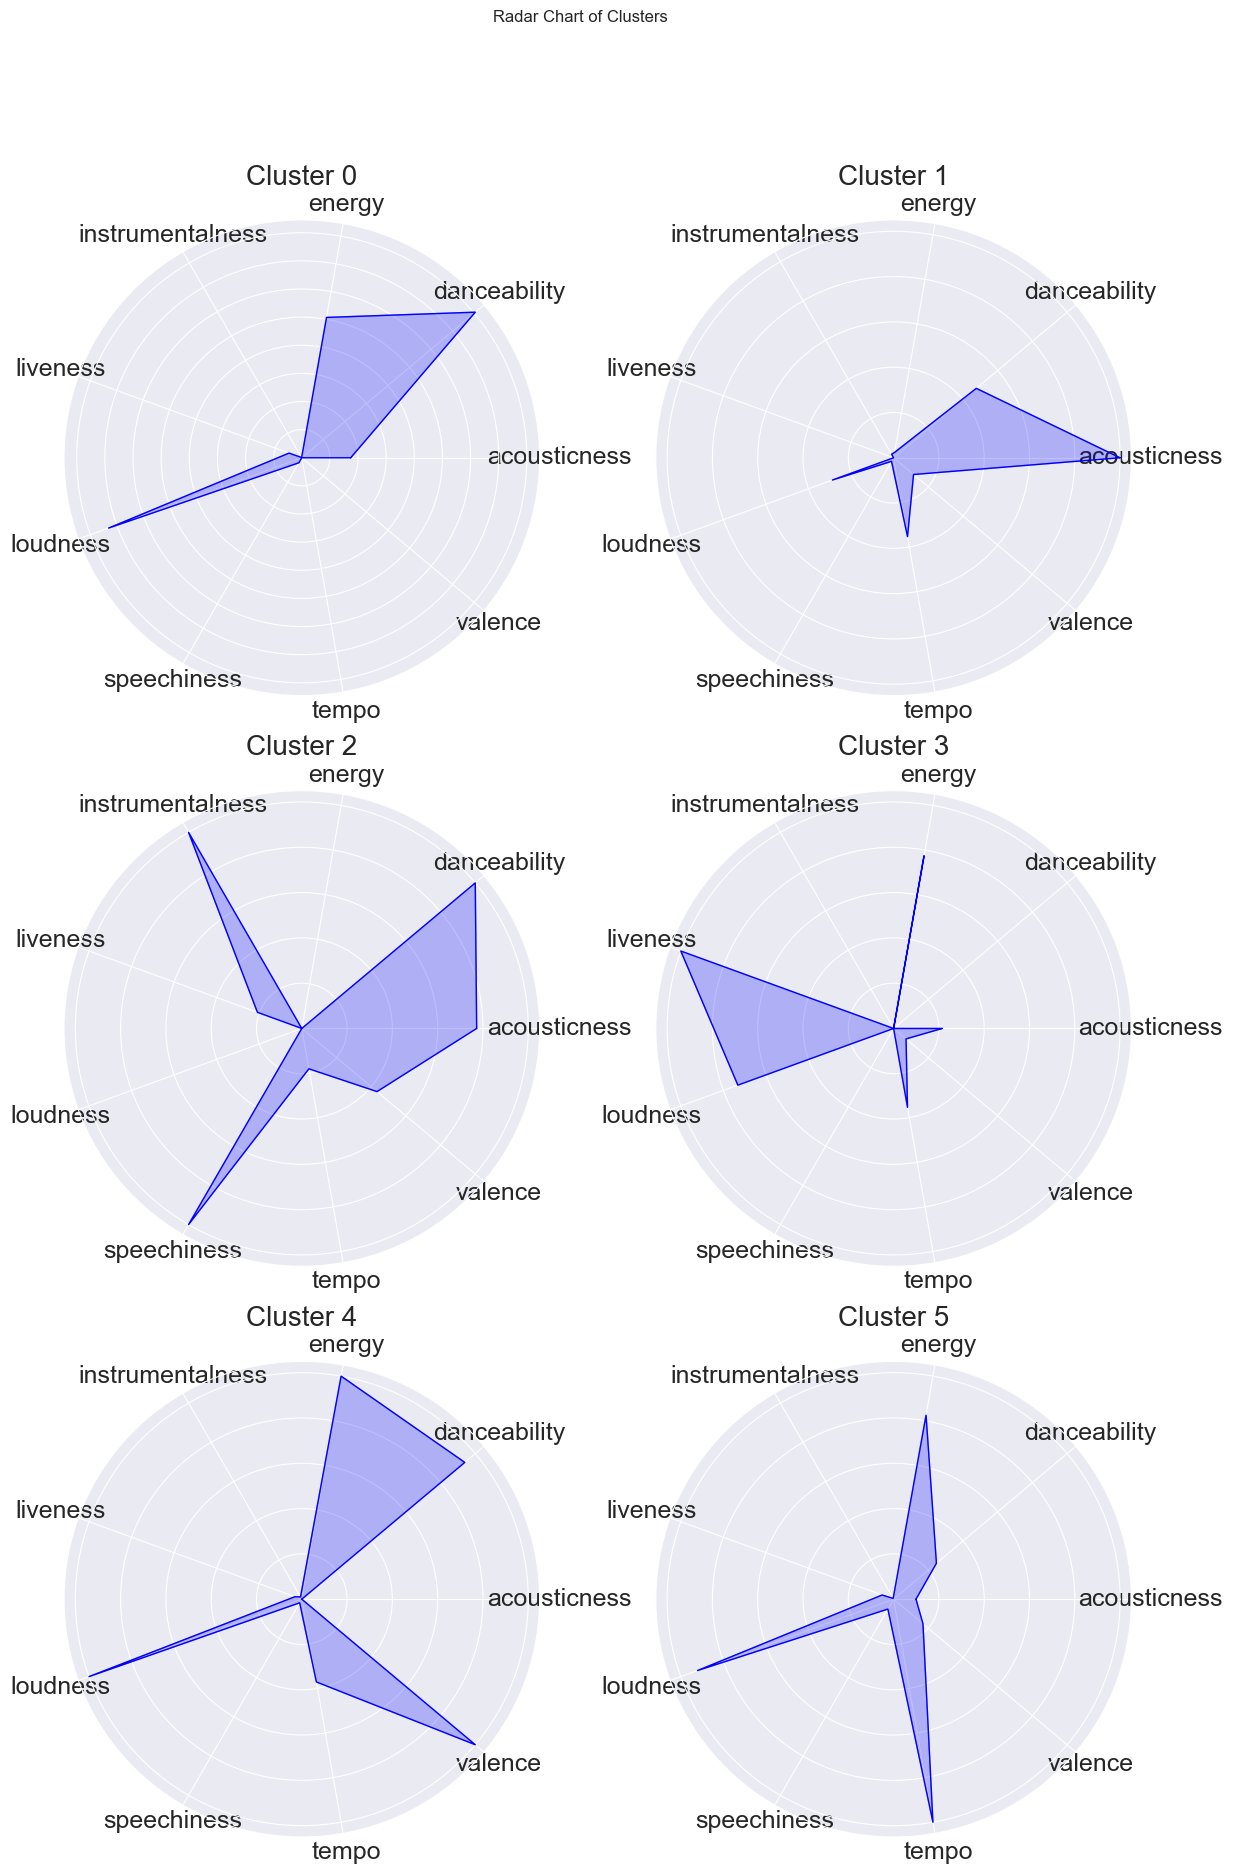

In [67]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                   'liveness', 'loudness', 'speechiness', 
                   'tempo', 'valence']


cluster_data = df[['cluster'] + numeric_columns]


cluster_data.dropna(inplace=True)


cluster_means = cluster_data.groupby('cluster').mean()


scaler = MinMaxScaler()
cluster_means_normalized = scaler.fit_transform(cluster_means)

features = numeric_columns
num_clusters = len(cluster_means_normalized)

def plot_radar_chart(ax, values, category_labels, title):
    num_vars = len(values)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))  
    angles += angles[:1] 
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=1, linestyle='solid')
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(category_labels, fontsize=18)
    ax.set_title(title, fontsize=20)


fig, axs = plt.subplots(nrows=3, ncols=2, subplot_kw=dict(polar=True), figsize=(14, 21))
fig.suptitle('Radar Chart of Clusters')


axs = axs.flatten()

for i, ax in enumerate(axs[:num_clusters]):
    values = cluster_means_normalized[i]
    plot_radar_chart(ax, values, features, f'Cluster {i}')


if num_clusters < 6:
    for j in range(num_clusters, 6):
        fig.delaxes(axs[j])


plt.show()


In [69]:
output_file_path = 'playlist_tracks_cluster.csv'
df.to_csv(output_file_path, index=False)